In [8]:
import pandas as pd
from statsmodels.api import OLS
import statsmodels.api as sm
import statsmodels.stats.api as sms
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

### Handling Missing Values

Here, we handle missing values in our dataset. However, it's important to note that the specific function `na.omit` from R does not have a direct equivalent in Python. Instead, we use Pandas DataFrame methods to achieve similar results.

Here are the steps:

1. **Loading the Dataset:**
   - We load our dataset, named "Auto.csv," into a Pandas DataFrame using the `read_csv` function.

2. **Replacing Missing Values:**
   - We replace any "?" values in the dataset with NaN (missing values) using the `na_values` parameter of `read_csv`. This step is crucial for data cleanliness and analysis.


3. **Handling Missing Values:**
   - While the code does not include the replacement of missing values, it's a common practice in Python to handle missing data using method like `dropna()` provided by Pandas. These methods allow us to remove rows with missing values or impute missing values with appropriate strategies.

In [9]:
# Load the dataset
auto = pd.read_csv("/Users/...", na_values="?")
# print(auto)

# Remove rows with missing values
auto.dropna(inplace=True)
# print(auto)

### Linear Regression Analysis

Here, we perform a linear regression analysis using the `Statsmodels` library. Here are the key steps:

1. **Defining Variables:**
   - Here, X represents the predictor variables, and y is the variable we want to predict.

2. **Adding a Constant Term:**
   - The `add_constant` function is used to add a intercept to our regression model. This intercept represents the predicted value when all independent variables are equal to zero.

3. **Fitting the Regression Model:**
   - We create a linear regression model using the OLS method provided by the `Statsmodels` library. The `fit` method is used to fit the model to our data, and the results are stored in `lm_fit`.

4. **Regression Summary:**
   - We print a summary of the regression results using the `summary` method on the `lm_fit` object. This summary provides valuable statistics, including:
     - R-squared: A measure of the goodness of fit.
     - Coefficients: The estimated coefficients for each independent variable.
     - Standard Errors: The standard errors associated with each coefficient estimate.
     - p-values: Indicating the significance of each coefficient.
     - Other statistics like F-statistic, AIC, BIC, and more.

In [3]:
# (a)
# Define the independent and dependent variables
X = auto[['horsepower', 'displacement', 'year', 'weight', 'acceleration', 'cylinders']]
X = sm.add_constant(X)  # Add an intercept
y = auto['mpg']

# Fit the linear regression model
lm_fit = OLS(y, X).fit()

# Display the summary of the model
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Thu, 21 Sep 2023   Prob (F-statistic):          3.79e-135
Time:                        00:41:02   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.5353      4.764     -3.051   

## Hypothesis Test for 'Horsepower' and 'Displacement' Coefficients

Here, a linear hypothesis test is conducted to examine whether the coefficients of 'horsepower' and 'displacement' are jointly equal to zero.

- Null Hypothesis (H0): Both coefficients are zero.

The `f_test` function is used to perform the test, and the results are printed.

In [4]:
# (b)
# Hypothesis test to check if 'horsepower' and 'displacement' have a significant linear relationship
myH0 = ["horsepower", "displacement"]
linear_hypothesis = lm_fit.f_test(myH0)
print(linear_hypothesis)

# F-test that omits single variable equal to t-test in summary
print(lm_fit.f_test("displacement = 0"))

<F test: F=0.5700896229536826, p=0.5659513693098603, df_denom=385, df_num=2>
<F test: F=1.0890716871871406, p=0.29733180488895905, df_denom=385, df_num=1>


## Residual Plot for Heteroskedasticity and Linearity Check

The residual plot indicates two important assumptions in linear regression: heteroskedasticity and linearity.

- **Heteroskedasticity:** A curvy pattern in the red line suggests that the spread of data points is not the same throughout. This can be a problem because it violates MLR5, which is that the variability of errors should be constant.

- **Linearity Assessment:** The systematic pattern in residuals, like the curved shape in the plot, suggests that the linear regression model may not accurately capture the true relationship between variables.

The code utilizes Matplotlib to create a scatter plot of residuals against the fitted values, with a blue dashed line representing the zero-residual line. This plot helps us visually assess the two assumptions.

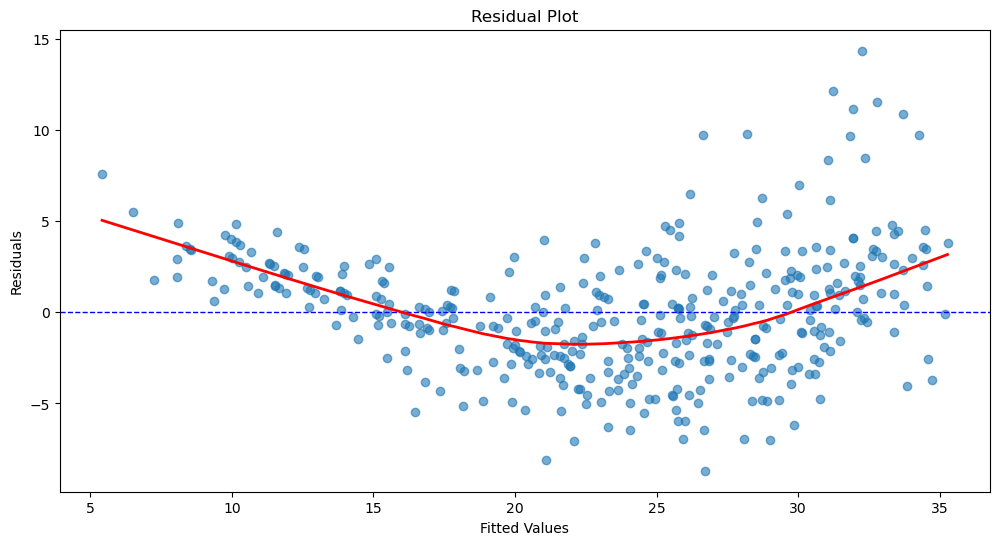

In [5]:
# Calculate residuals
residuals = lm_fit.resid

# Create a residual plot
plt.figure(figsize=(12, 6))  # Plot size
plt.scatter(lm_fit.fittedvalues, residuals, alpha=0.6)

# Add a blue dashed line at y=0
plt.axhline(y=0, color='b', linestyle='--', linewidth=1)

# Fit a loess curve to the residuals
loess = sm.nonparametric.lowess(residuals, lm_fit.fittedvalues, frac=0.5)
plt.plot(loess[:, 0], loess[:, 1], color='r', linewidth=2)

plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()



### Breusch-Pagan Test for Homoskedasticity
The Breusch-Pagan test is used to check for the presence of **Homoskedasticity** in the residuals of a regression model. 
- `sms.het_breuschpagan(lm_fit.resid, lm_fit.model.exog)`: This function from Statsmodels performs the Breusch-Pagan test.

### Durbin-Watson Test for Autocorrelation
The Durbin-Watson test is used to detect the presence of **correlation** in the residuals of a regression model. 

- `sm.stats.stattools.durbin_watson(lm_fit.resid)`: This function from Statsmodels calculates the Durbin-Watson statistic.

### Shapiro-Wilk Test for Normality
The Shapiro-Wilk test is used to check whether the residuals of a regression model follow a **normal distribution**. It tests the null hypothesis that the data is normally distributed.

- `sms.shapiro(lm_fit.resid)`: This function from Statsmodels performs the Shapiro-Wilk test for normality.

In [6]:
# Breusch-Pagan test for heteroskedasticity
het_test = sms.het_breuschpagan(lm_fit.resid, lm_fit.model.exog)
print("Studentized Breusch-Pagan test results:")
print("BP =", het_test[0])
print("p-value =", het_test[1])
print("df =", het_test[2])
print("*******************")

# Durbin-Watson test for autocorrelation
dw_test = sm.stats.stattools.durbin_watson(lm_fit.resid)
print("Durbin-Watson test results:")
print("DW =", dw_test)
print("*******************")

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(lm_fit.resid)
print("Shapiro-Wilk normality test results:")
print("Test Statistic =", shapiro_test.statistic)
print("p-value =", shapiro_test.pvalue)

Studentized Breusch-Pagan test results:
BP = 29.944165082479024
p-value = 4.02809158530308e-05
df = 5.306963938025703
*******************
Durbin-Watson test results:
DW = 1.2318834242780352
*******************
Shapiro-Wilk normality test results:
Test Statistic = 0.9724864363670349
p-value = 9.194630479214538e-07


## Detecting Collinearity with Variance Inflation Factors (VIF)

Here, we perform a check for **collinearity** among the independent variables using Variance Inflation Factors (VIF). Collinearity occurs when independent variables in a regression model are highly correlated, leading to unstable coefficient estimates.

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the Variance Inflation Factors (VIF) for the independent variables
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


       Features         VIF
0         const  753.863747
1    horsepower    9.398043
2  displacement   19.641683
3          year    1.244829
4        weight   10.731681
5  acceleration    2.625581
6     cylinders   10.633049
